In [146]:
## Correlation Analysis
import numpy as np
import matplotlib.pyplot as plt

In [147]:
# Initialize variables
x = np.array(range(1000))
y = x

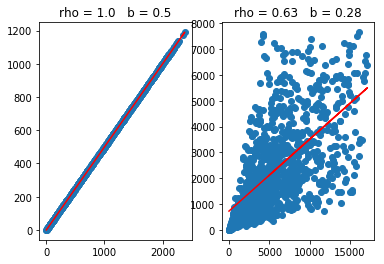

In [148]:
scales = np.linspace (.1, 7, num=2)

fig = plt.figure()

for ii in range(0,scales.size):
    plt.subplot(1,2,ii+1)
    for i in range(0,x.size):
        x[i] = x[i]+np.float(np.random.rand(1))*(i*scales[ii])
        y[i] = y[i]+np.float(np.random.rand(1))*(i*scales[ii])
    x = x*2;
    plt.plot(x,y,'o')
    rho = np.corrcoef(x,y);
    rho = rho[1][0]
    fit = np.polyfit(x,y,1)
    y_fit = np.polyval(fit,x)
    plt.plot(x,y_fit,'r-')
    plt.title ('rho = ' + str(round(rho,2)) + '   ' + 'b = ' + str(round(fit[0],2)))

##### The Person correlation coefficient is given by:
$${\displaystyle r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}
{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}}$$

Where: $ {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})} $ is the uncorrected sample covariance of of$\ xy$.

and $ \sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}} $ is the uncorrected sample standard deviation of$\ {x}$.

The normalizers $\ {n} - 1$ of both the covariances and standard deviation cancel each others out. 

In [138]:
## Calculate correlation and regression coefficients step-by-step
# Pearson correlation

# nominator - covariance of x and y without the normalizer (n -1)
corr_n =         sum((x - np.mean(x)) * (y - np.mean(y))) 
# denominator - product of the variance of x and y without the normalizer (n -1)
corr_d =   np.sqrt(sum((x - np.mean(x))**2) * sum((y - np.mean(y))**2)) # denominator

rho = corr_n/corr_d;

print('rho = ' + str(round(rho,2)))

rho = 0.65


If one $\ x$ or$\ y$ is a constant, both the nominator and denominator are equal to 0, therefore rho is **undefined**.

##### The  general regression formula:

$$ \ y = \beta x + \alpha $$ 

where $\beta $ is the slope or regression coefficient and  $\alpha$ is the intercept.  

##### The slope can be calculated from the rho: 

$$ \beta = \ r_{xy}\frac{\ S_x}{S_y} $$

where$\ S $ is the uncorrected sample standard deviation.  

##### And the intercept is defined by:

$$ \alpha = \bar {y} - \beta\bar {x}$$ 


In [123]:
# Linear regression
sd_x = np.sqrt(sum((x - np.mean(x))**2)/x.size-1)# standard deviation of y 
sd_y = np.sqrt(sum((y - np.mean(y))**2)/y.size-1)# standard deviation of y

b = rho*(sd_y/sd_x) # slope
a = np.mean(y) - b*(np.mean(x)) #intercept

print('b = ' + str(round(b,2)))
print('a = ' + str(round(a,2)))

b = 0.28
a = 748.62
